In [1]:
import pandas as pd
file_path = r"C:\Users\rianl\Downloads\Full_addresses_with_geodata.csv"  
Full_addresses_with_geodata = pd.read_csv(file_path)

In [2]:
Full_addresses_with_geodata.shape

(10445, 13)

In [3]:
Full_addresses_with_geodata = Full_addresses_with_geodata.dropna(subset=['longitude', 'latitude'])

In [4]:
Full_addresses_with_geodata.shape

(10445, 13)

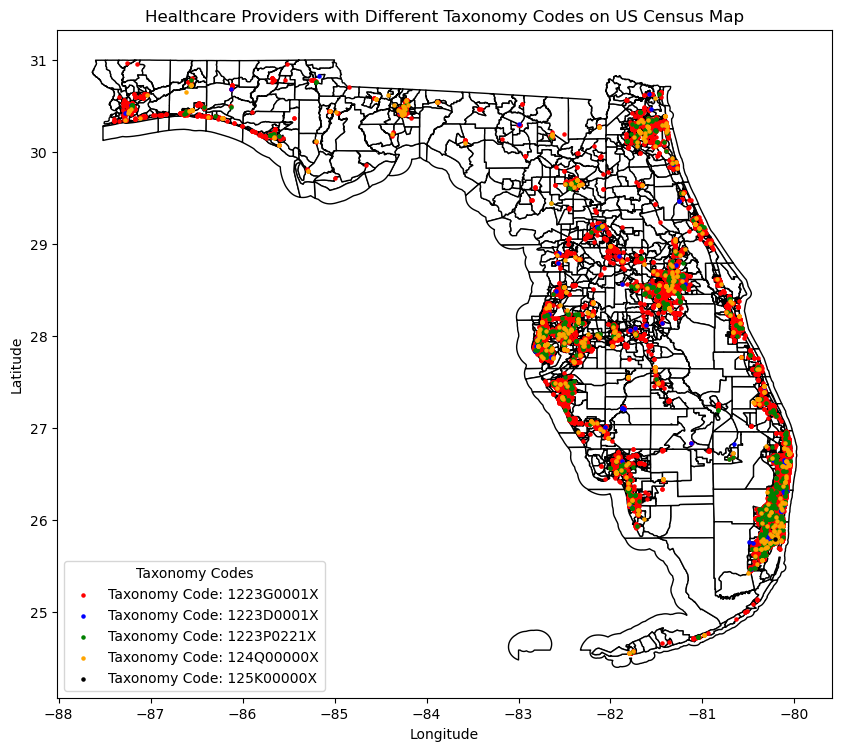

In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Ensure latitude and longitude are valid
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'].notnull()) & 
    (Full_addresses_with_geodata['longitude'].notnull())
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'] >= -90) & 
    (Full_addresses_with_geodata['latitude'] <= 90)
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['longitude'] >= -180) & 
    (Full_addresses_with_geodata['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Read the shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
census_tracts = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(census_tracts.crs)

# Step 4: Plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the Census Tract map
census_tracts.plot(ax=ax, color='white', edgecolor='black')

# Define colors for each taxonomy code
colors = {
    '1223G0001X': 'red',
    '1223D0001X': 'blue',
    '1223P0221X': 'green',
    '125J00000X': 'purple',
    '124Q00000X': 'orange',
    '125K00000X': 'black'
}

# Plot points for each taxonomy code
for taxonomy_code, color in colors.items():
    subset = gdf[gdf['Healthcare.Provider.Taxonomy.Code_1'] == taxonomy_code]
    if not subset.empty:
        subset.plot(ax=ax, color=color, markersize=5, label=f'Taxonomy Code: {taxonomy_code}')

# Add labels and title
plt.title('Healthcare Providers with Different Taxonomy Codes on US Census Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Ensure the aspect ratio is set to be equal
ax.set_aspect('equal')

# Add legend with specific location
plt.legend(loc='lower left', bbox_to_anchor=(0, 0), title="Taxonomy Codes")

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


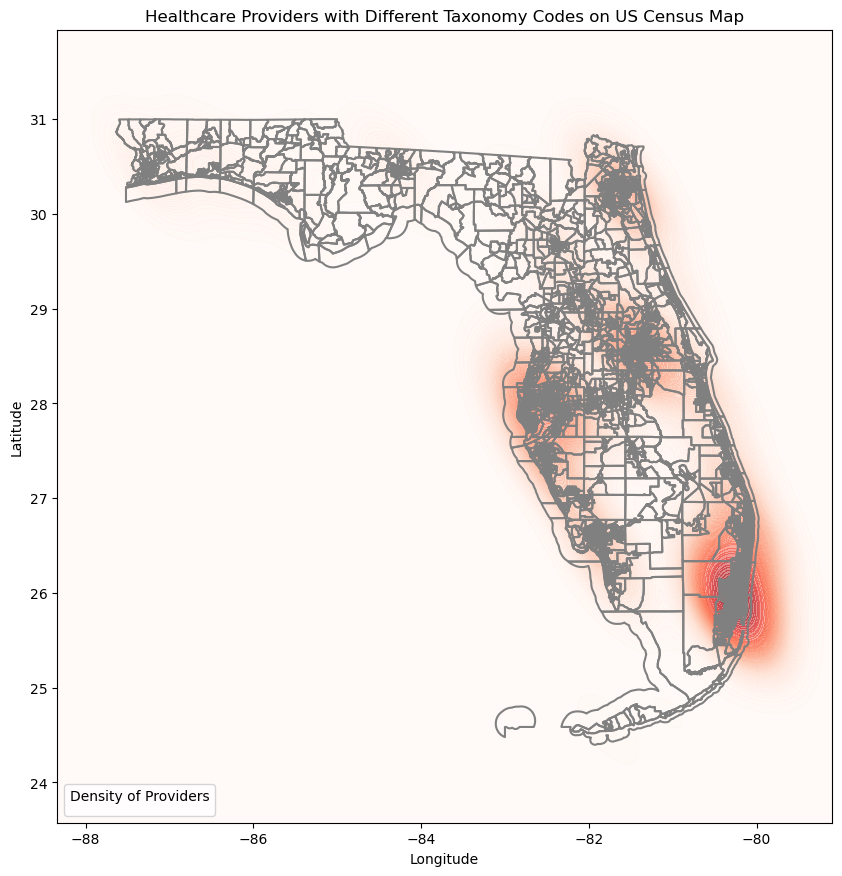

In [6]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Ensure latitude and longitude are valid
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'].notnull()) & 
    (Full_addresses_with_geodata['longitude'].notnull())
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'] >= -90) & 
    (Full_addresses_with_geodata['latitude'] <= 90)
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['longitude'] >= -180) & 
    (Full_addresses_with_geodata['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Read the shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
census_tracts = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(census_tracts.crs)

# Step 4: Plot the base map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the Census Tract map
census_tracts.boundary.plot(ax=ax, color='grey')

# Create a scatter plot for heatmap
sns.kdeplot(
    data=gdf, x='longitude', y='latitude', 
    fill=True, thresh=0, levels=100, cmap='Reds', alpha=0.5, ax=ax
)

# Add labels and title
plt.title('Healthcare Providers with Different Taxonomy Codes on US Census Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add legend with specific location
plt.legend(loc='lower left', bbox_to_anchor=(0, 0), title="Density of Providers")

plt.show()


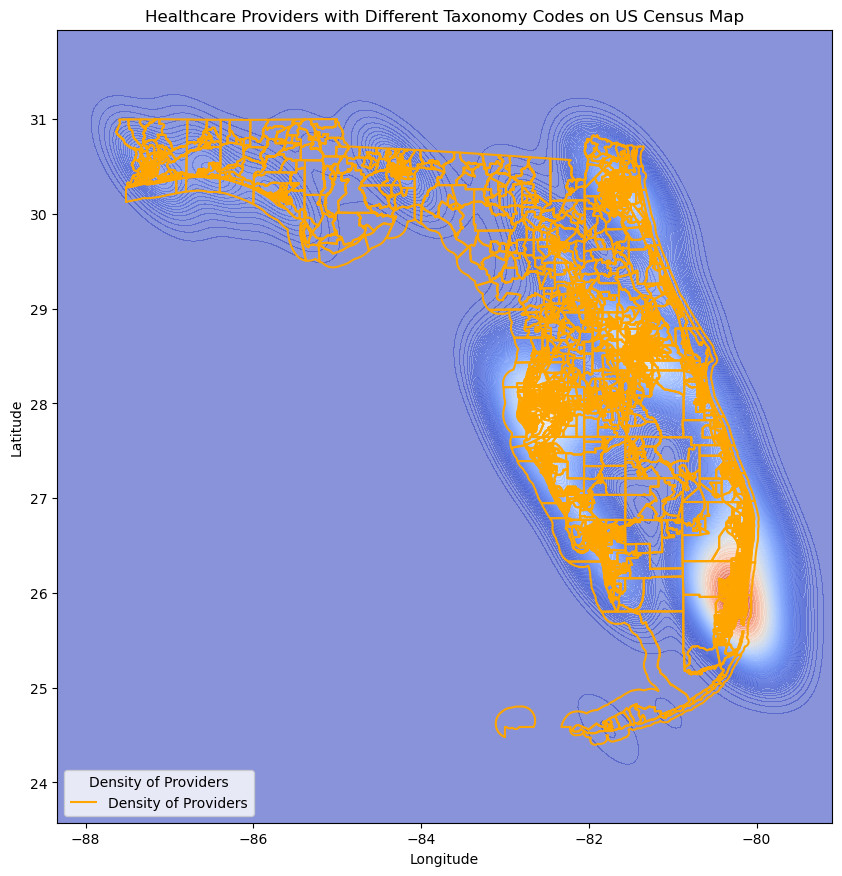

In [7]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Ensure latitude and longitude are valid
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'].notnull()) & 
    (Full_addresses_with_geodata['longitude'].notnull())
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'] >= -90) & 
    (Full_addresses_with_geodata['latitude'] <= 90)
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['longitude'] >= -180) & 
    (Full_addresses_with_geodata['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Read the shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
census_tracts = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(census_tracts.crs)

# Step 4: Plot the base map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the Census Tract map
census_tracts.boundary.plot(ax=ax, color='orange')

# Create a scatter plot for heatmap
sns.kdeplot(
    data=gdf, x='longitude', y='latitude', 
    fill=True, thresh=0, levels=100, cmap='coolwarm', alpha=0.6, ax=ax
)

# Add labels and title
plt.title('Healthcare Providers with Different Taxonomy Codes on US Census Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add legend with specific location inside the plot
legend = ax.legend(['Density of Providers'], loc='lower left', title="Density of Providers")
legend.set_visible(True)

plt.show()


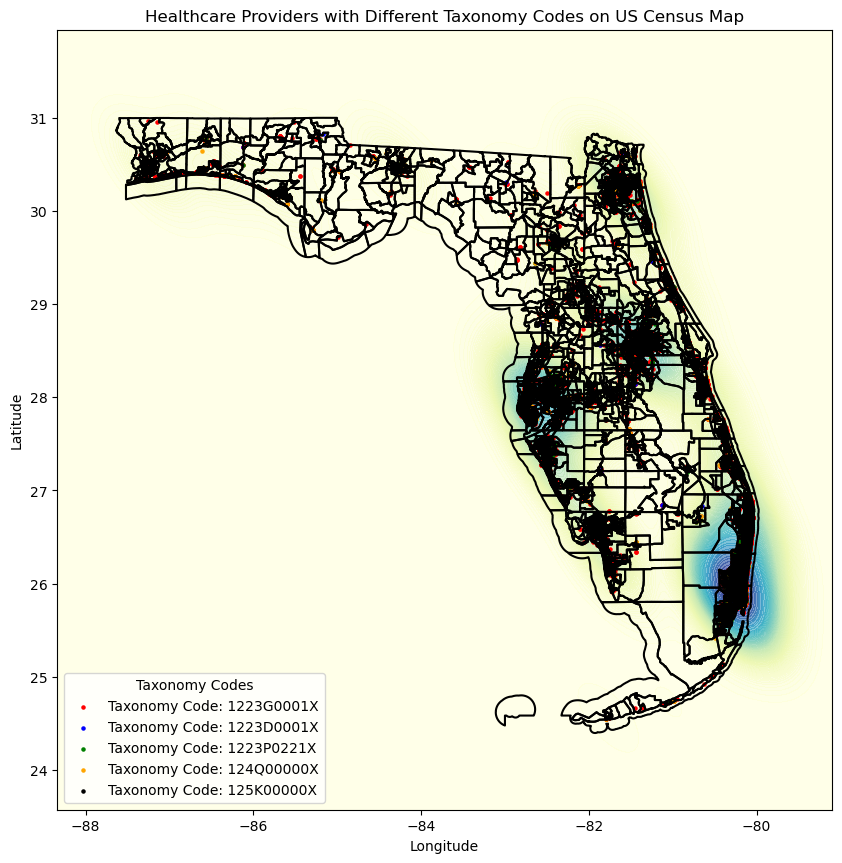

In [8]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Ensure latitude and longitude are valid
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'].notnull()) & 
    (Full_addresses_with_geodata['longitude'].notnull())
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'] >= -90) & 
    (Full_addresses_with_geodata['latitude'] <= 90)
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['longitude'] >= -180) & 
    (Full_addresses_with_geodata['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Read the shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
census_tracts = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(census_tracts.crs)

# Step 4: Plot the base map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the Census Tract map
census_tracts.boundary.plot(ax=ax, color='black')

# Create a scatter plot for heatmap
sns.kdeplot(
    data=gdf, x='longitude', y='latitude', 
    fill=True, thresh=0, levels=100, cmap='YlGnBu', alpha=0.6, ax=ax
)

# Define colors for each taxonomy code
colors = {
    '1223G0001X': 'red',
    '1223D0001X': 'blue',
    '1223P0221X': 'green',
    '125J00000X': 'purple',
    '124Q00000X': 'orange',
    '125K00000X': 'black'
}

# Plot points for each taxonomy code
for taxonomy_code, color in colors.items():
    subset = gdf[gdf['Healthcare.Provider.Taxonomy.Code_1'] == taxonomy_code]
    if not subset.empty:
        subset.plot(ax=ax, color=color, markersize=5, label=f'Taxonomy Code: {taxonomy_code}')

# Add labels and title
plt.title('Healthcare Providers with Different Taxonomy Codes on US Census Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add legend with specific location inside the plot
plt.legend(loc='lower left', bbox_to_anchor=(0, 0), title="Taxonomy Codes")

plt.show()


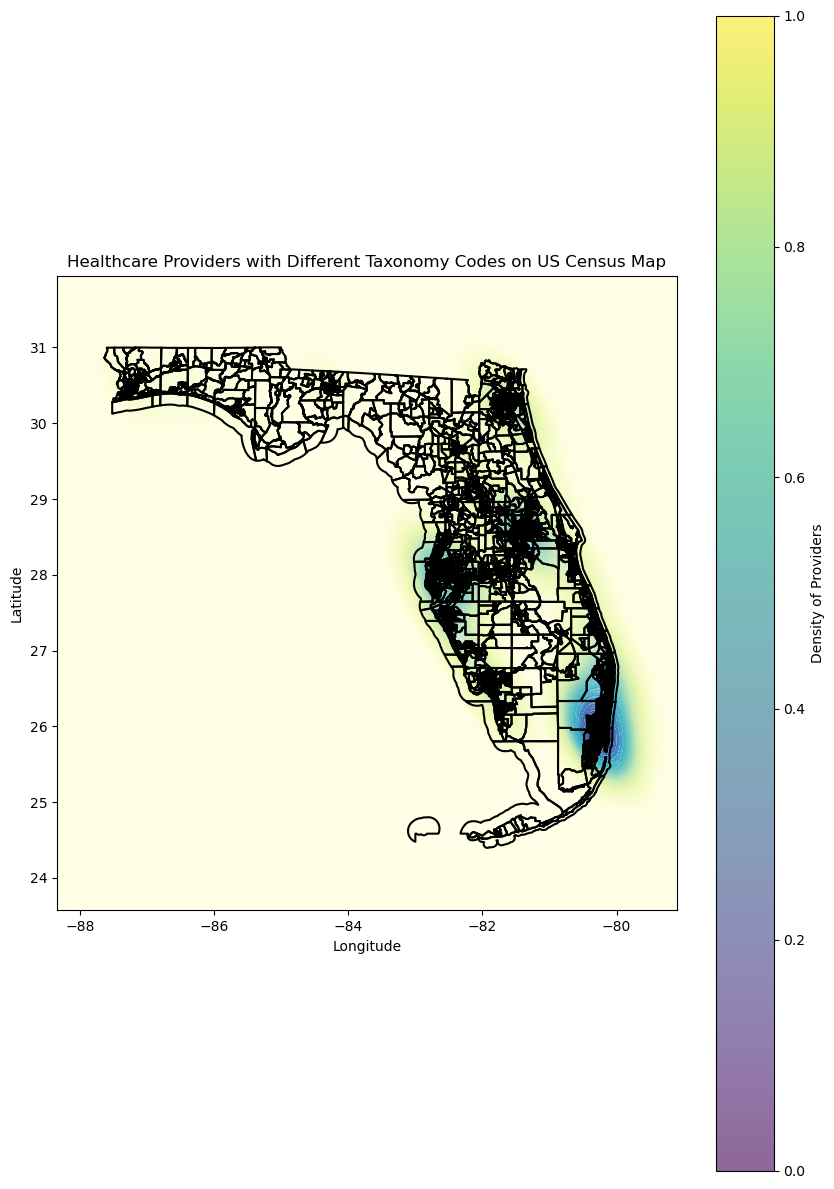

In [9]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Ensure latitude and longitude are valid
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'].notnull()) & 
    (Full_addresses_with_geodata['longitude'].notnull())
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'] >= -90) & 
    (Full_addresses_with_geodata['latitude'] <= 90)
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['longitude'] >= -180) & 
    (Full_addresses_with_geodata['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Read the shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
census_tracts = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(census_tracts.crs)

# Step 4: Plot the base map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the Census Tract map
census_tracts.boundary.plot(ax=ax, color='black')

# Create a scatter plot for heatmap
heatmap = sns.kdeplot(
    data=gdf, x='longitude', y='latitude', 
    fill=True, thresh=0, levels=100, cmap='YlGnBu', alpha=0.6, ax=ax
)

# Add labels and title
plt.title('Healthcare Providers with Different Taxonomy Codes on US Census Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add color bar
cbar = heatmap.figure.colorbar(heatmap.get_children()[10], ax=ax, orientation='vertical')
cbar.set_label('Density of Providers')

plt.show()


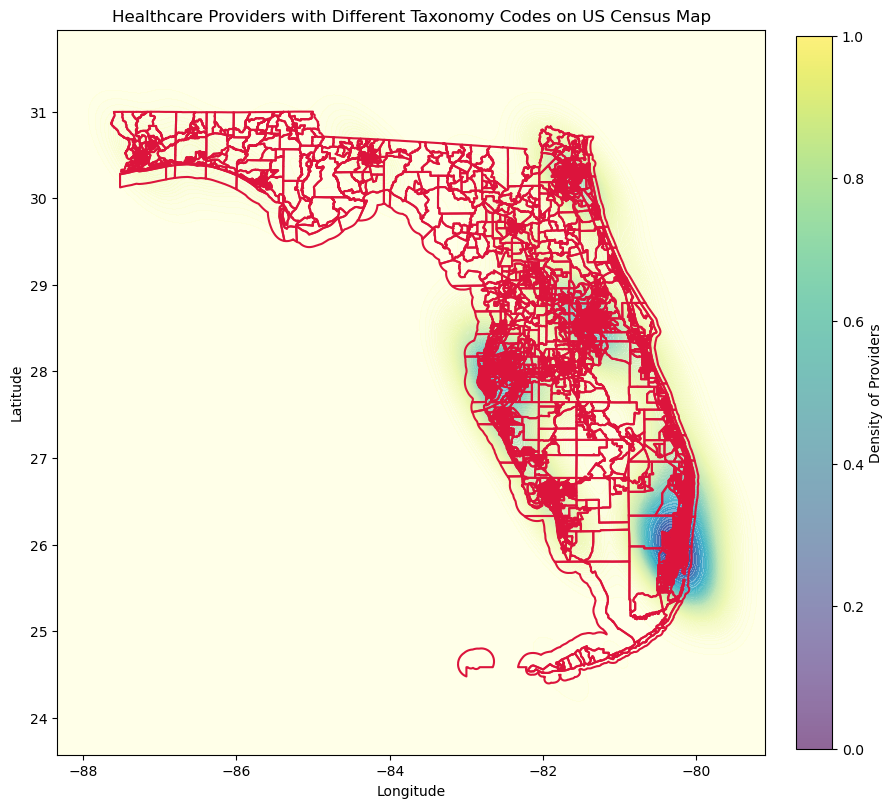

In [10]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Ensure latitude and longitude are valid
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'].notnull()) & 
    (Full_addresses_with_geodata['longitude'].notnull())
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'] >= -90) & 
    (Full_addresses_with_geodata['latitude'] <= 90)
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['longitude'] >= -180) & 
    (Full_addresses_with_geodata['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Read the shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
census_tracts = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(census_tracts.crs)

# Step 4: Plot the base map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the Census Tract map
census_tracts.boundary.plot(ax=ax, color='crimson')

# Create a scatter plot for heatmap
heatmap = sns.kdeplot(
    data=gdf, x='longitude', y='latitude', 
    fill=True, thresh=0, levels=100, cmap='YlGnBu', alpha=0.6, ax=ax
)

# Add labels and title
plt.title('Healthcare Providers with Different Taxonomy Codes on US Census Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add color bar
cbar = fig.colorbar(heatmap.get_children()[4], ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Density of Providers')

plt.show()


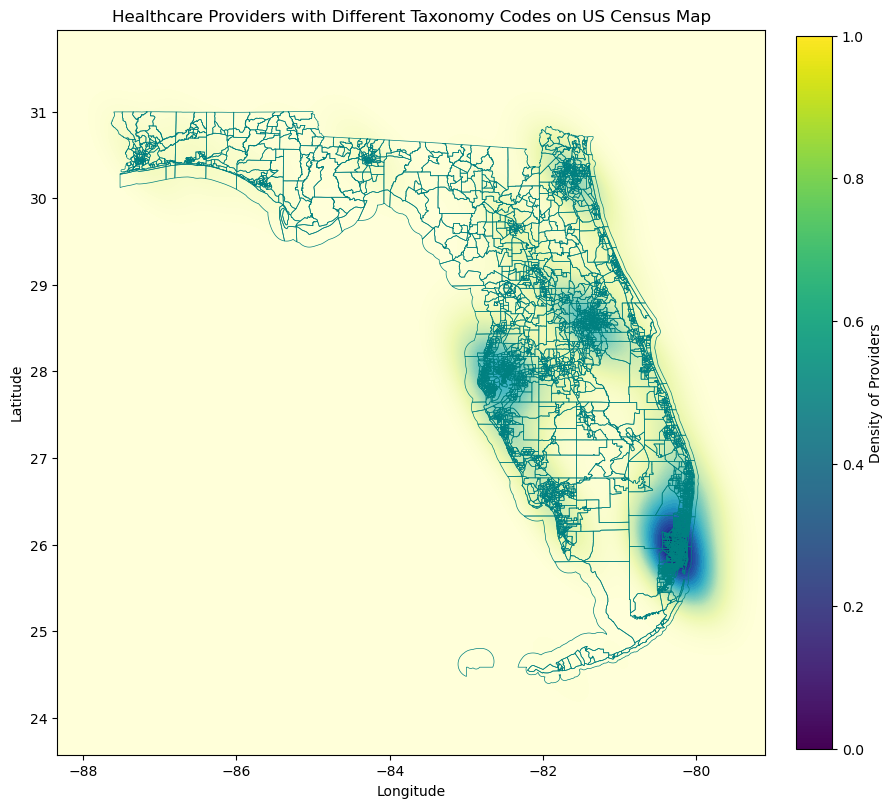

In [20]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Ensure latitude and longitude are valid
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'].notnull()) & 
    (Full_addresses_with_geodata['longitude'].notnull())
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'] >= -90) & 
    (Full_addresses_with_geodata['latitude'] <= 90)
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['longitude'] >= -180) & 
    (Full_addresses_with_geodata['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Read the shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
census_tracts = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(census_tracts.crs)

# Step 4: Plot the base map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the Census Tract map with thinner lines
census_tracts.boundary.plot(ax=ax, color='teal', linewidth=0.5)

# Create a scatter plot for heatmap
heatmap = sns.kdeplot(
    data=gdf, x='longitude', y='latitude', 
    fill=True, thresh=0, levels=100, cmap='YlGnBu', alpha=1, ax=ax
)

# Add labels and title
plt.title('Healthcare Providers with Different Taxonomy Codes on US Census Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add color bar
cbar = fig.colorbar(heatmap.get_children()[4], ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Density of Providers')

plt.show()


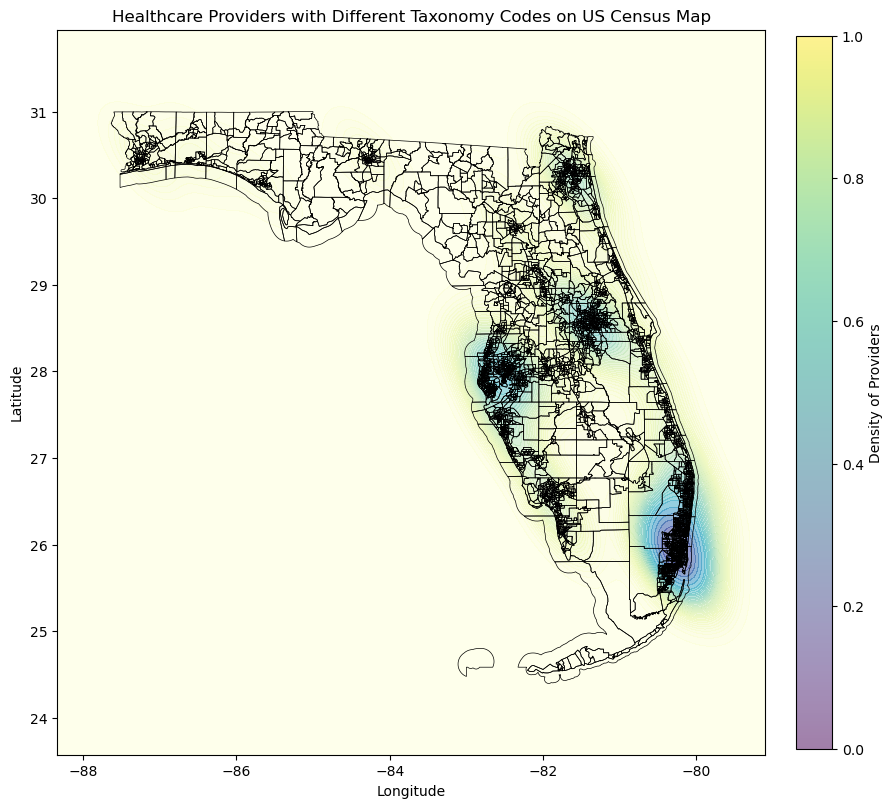

In [52]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Ensure latitude and longitude are valid
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'].notnull()) & 
    (Full_addresses_with_geodata['longitude'].notnull())
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'] >= -90) & 
    (Full_addresses_with_geodata['latitude'] <= 90)
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['longitude'] >= -180) & 
    (Full_addresses_with_geodata['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Read the shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
census_tracts = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(census_tracts.crs)

# Step 4: Plot the base map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the Census Tract map with thinner lines
census_tracts.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Create a scatter plot for heatmap
heatmap = sns.kdeplot(
    data=gdf, x='longitude', y='latitude', 
    fill=True, thresh=0, levels=40, cmap='YlGnBu', alpha=0.5, ax=ax
)

# Add labels and title
plt.title('Healthcare Providers with Different Taxonomy Codes on US Census Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add color bar
cbar = fig.colorbar(heatmap.get_children()[4], ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Density of Providers')

plt.show()


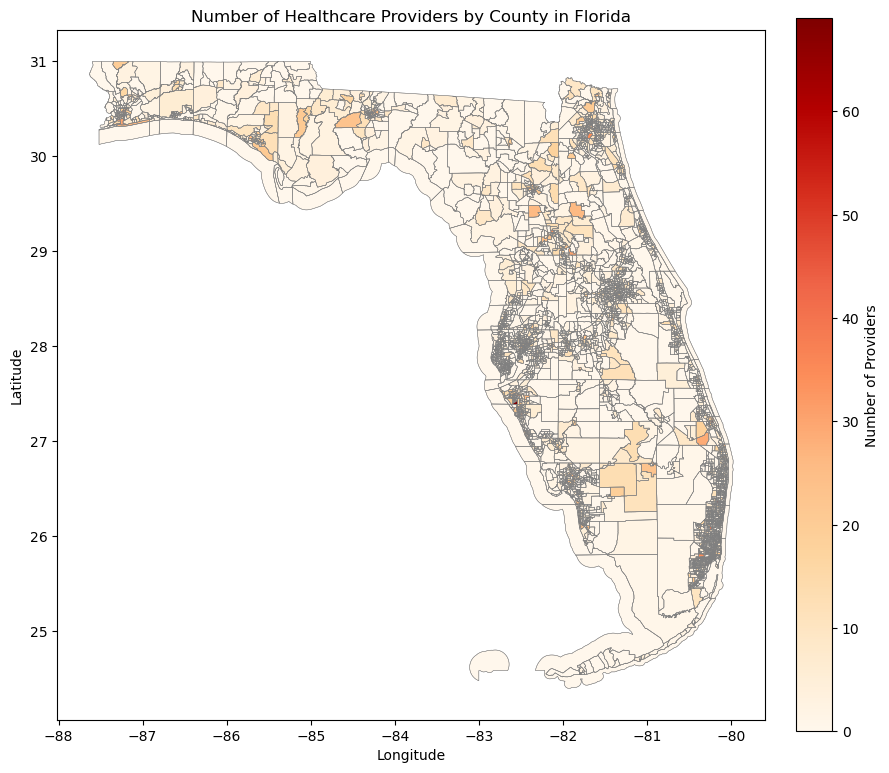

In [58]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Ensure latitude and longitude are valid
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'].notnull()) & 
    (Full_addresses_with_geodata['longitude'].notnull())
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'] >= -90) & 
    (Full_addresses_with_geodata['latitude'] <= 90)
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['longitude'] >= -180) & 
    (Full_addresses_with_geodata['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the Census Tract map with thinner lines
counties.boundary.plot(ax=ax, color='gray', linewidth=0.3)

# Plot the provider counts with a red color map
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='OrRd', linewidth=0.3, edgecolor='gray')

# Add labels and title
plt.title('Number of Healthcare Providers by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


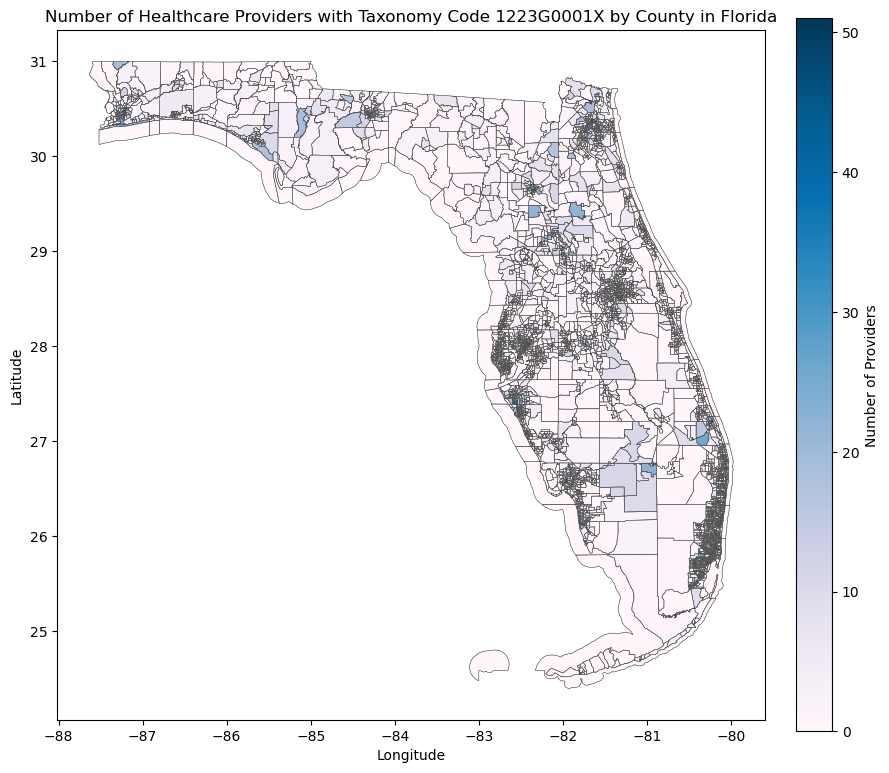

In [57]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Filter for the taxonomy code "1223G0001X"
filtered_data = Full_addresses_with_geodata[Full_addresses_with_geodata['Healthcare.Provider.Taxonomy.Code_1'] == '1223G0001X']

# Ensure latitude and longitude are valid
filtered_data = filtered_data[
    (filtered_data['latitude'].notnull()) & 
    (filtered_data['longitude'].notnull())
]
filtered_data = filtered_data[
    (filtered_data['latitude'] >= -90) & 
    (filtered_data['latitude'] <= 90)
]
filtered_data = filtered_data[
    (filtered_data['longitude'] >= -180) & 
    (filtered_data['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(filtered_data['longitude'], filtered_data['latitude'])]
gdf = gpd.GeoDataFrame(filtered_data, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the provider counts with a darker red color map
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='PuBu', linewidth=0.3, edgecolor='black')

# Add the county boundaries on top
counties.boundary.plot(ax=ax, linewidth=0.2, color='grey', alpha=0.5)

# Add labels and title
plt.title('Number of Healthcare Providers with Taxonomy Code 1223G0001X by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


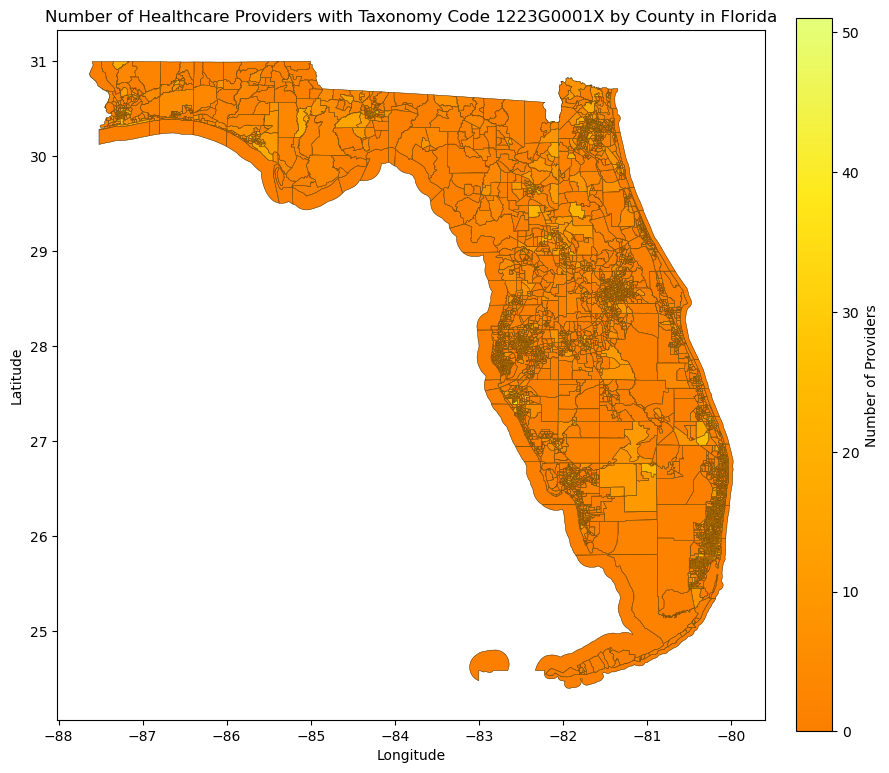

In [58]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Filter for the taxonomy code "1223G0001X"
filtered_data = Full_addresses_with_geodata[Full_addresses_with_geodata['Healthcare.Provider.Taxonomy.Code_1'] == '1223G0001X']

# Ensure latitude and longitude are valid
filtered_data = filtered_data[
    (filtered_data['latitude'].notnull()) & 
    (filtered_data['longitude'].notnull())
]
filtered_data = filtered_data[
    (filtered_data['latitude'] >= -90) & 
    (filtered_data['latitude'] <= 90)
]
filtered_data = filtered_data[
    (filtered_data['longitude'] >= -180) & 
    (filtered_data['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(filtered_data['longitude'], filtered_data['latitude'])]
gdf = gpd.GeoDataFrame(filtered_data, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the provider counts with a darker red color map
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='Wistia_r', linewidth=0.3, edgecolor='black')

# Add the county boundaries on top
counties.boundary.plot(ax=ax, linewidth=0.2, color='orange', alpha=0.5)

# Add labels and title
plt.title('Number of Healthcare Providers with Taxonomy Code 1223G0001X by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


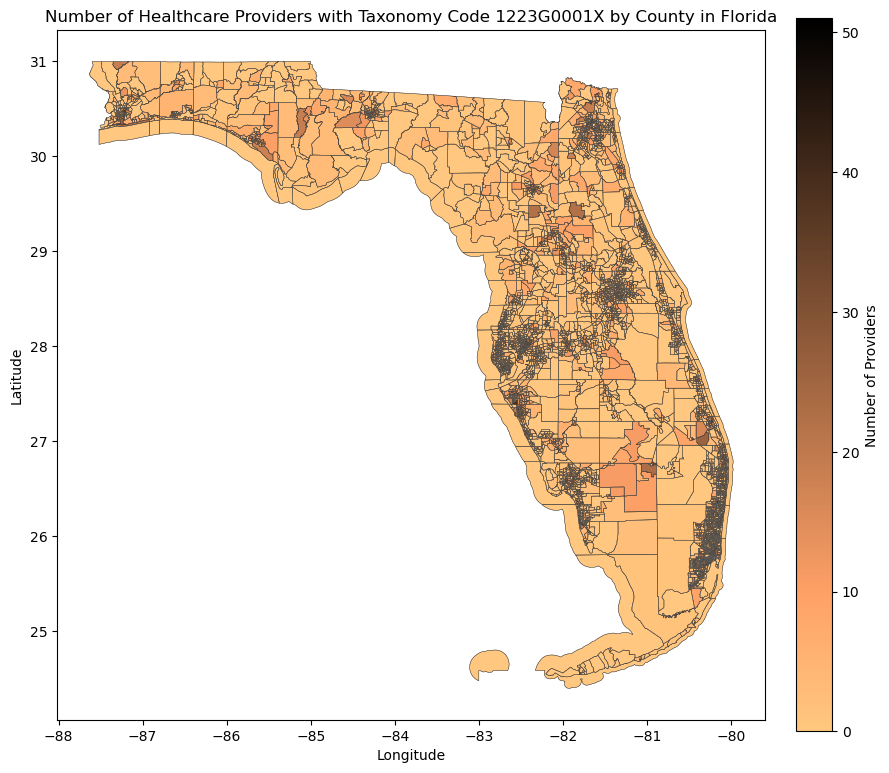

In [62]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Filter for the taxonomy code "1223G0001X"
filtered_data = Full_addresses_with_geodata[Full_addresses_with_geodata['Healthcare.Provider.Taxonomy.Code_1'] == '1223G0001X']

# Ensure latitude and longitude are valid
filtered_data = filtered_data[
    (filtered_data['latitude'].notnull()) & 
    (filtered_data['longitude'].notnull())
]
filtered_data = filtered_data[
    (filtered_data['latitude'] >= -90) & 
    (filtered_data['latitude'] <= 90)
]
filtered_data = filtered_data[
    (filtered_data['longitude'] >= -180) & 
    (filtered_data['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(filtered_data['longitude'], filtered_data['latitude'])]
gdf = gpd.GeoDataFrame(filtered_data, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the provider counts with a darker red color map
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='copper_r', linewidth=0.3, edgecolor='black')

# Add the county boundaries on top
counties.boundary.plot(ax=ax, linewidth=0.2, color='grey', alpha=0.5)

# Add labels and title
plt.title('Number of Healthcare Providers with Taxonomy Code 1223G0001X by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


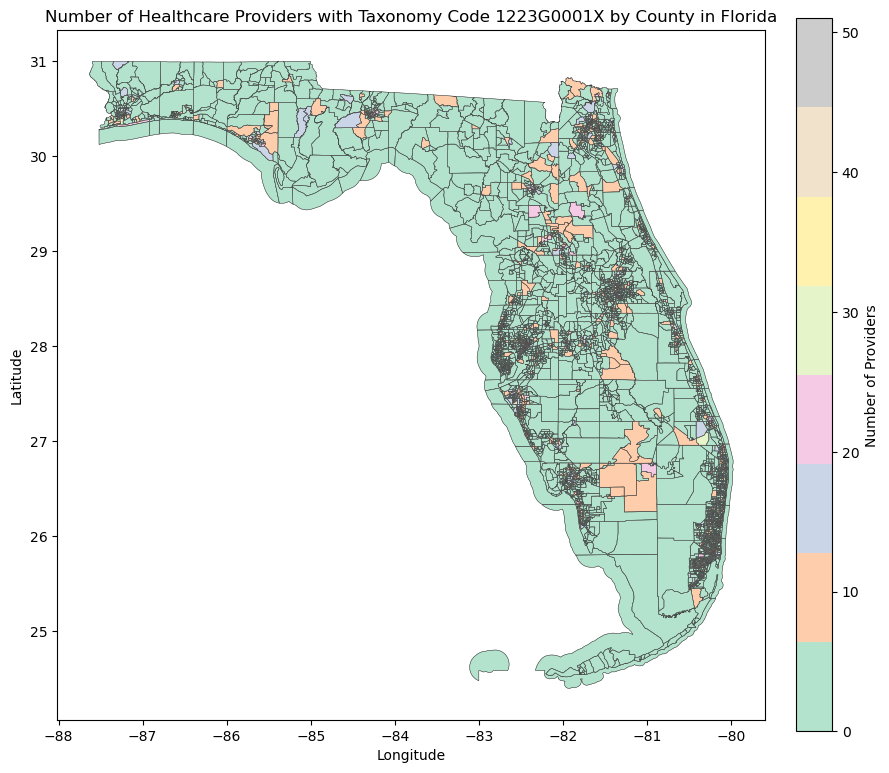

In [63]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Filter for the taxonomy code "1223G0001X"
filtered_data = Full_addresses_with_geodata[Full_addresses_with_geodata['Healthcare.Provider.Taxonomy.Code_1'] == '1223G0001X']

# Ensure latitude and longitude are valid
filtered_data = filtered_data[
    (filtered_data['latitude'].notnull()) & 
    (filtered_data['longitude'].notnull())
]
filtered_data = filtered_data[
    (filtered_data['latitude'] >= -90) & 
    (filtered_data['latitude'] <= 90)
]
filtered_data = filtered_data[
    (filtered_data['longitude'] >= -180) & 
    (filtered_data['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(filtered_data['longitude'], filtered_data['latitude'])]
gdf = gpd.GeoDataFrame(filtered_data, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the provider counts with a darker red color map
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='Pastel2', linewidth=0.3, edgecolor='black')

# Add the county boundaries on top
counties.boundary.plot(ax=ax, linewidth=0.2, color='grey', alpha=0.5)

# Add labels and title
plt.title('Number of Healthcare Providers with Taxonomy Code 1223G0001X by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


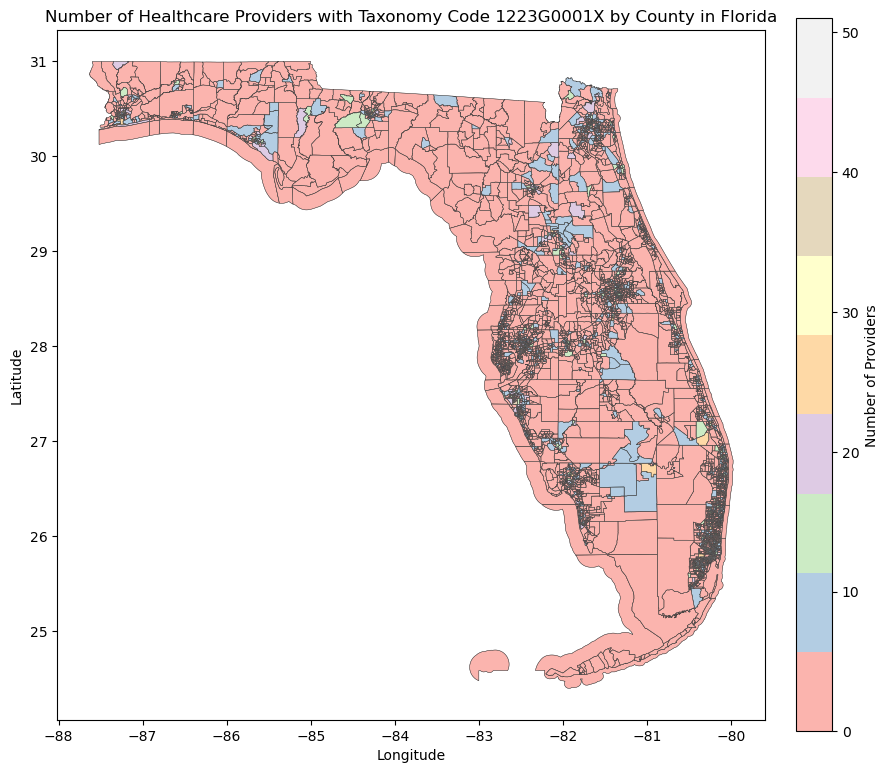

In [64]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Filter for the taxonomy code "1223G0001X"
filtered_data = Full_addresses_with_geodata[Full_addresses_with_geodata['Healthcare.Provider.Taxonomy.Code_1'] == '1223G0001X']

# Ensure latitude and longitude are valid
filtered_data = filtered_data[
    (filtered_data['latitude'].notnull()) & 
    (filtered_data['longitude'].notnull())
]
filtered_data = filtered_data[
    (filtered_data['latitude'] >= -90) & 
    (filtered_data['latitude'] <= 90)
]
filtered_data = filtered_data[
    (filtered_data['longitude'] >= -180) & 
    (filtered_data['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(filtered_data['longitude'], filtered_data['latitude'])]
gdf = gpd.GeoDataFrame(filtered_data, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the provider counts with a darker red color map
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='Pastel1', linewidth=0.3, edgecolor='black')

# Add the county boundaries on top
counties.boundary.plot(ax=ax, linewidth=0.2, color='grey', alpha=0.5)

# Add labels and title
plt.title('Number of Healthcare Providers with Taxonomy Code 1223G0001X by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


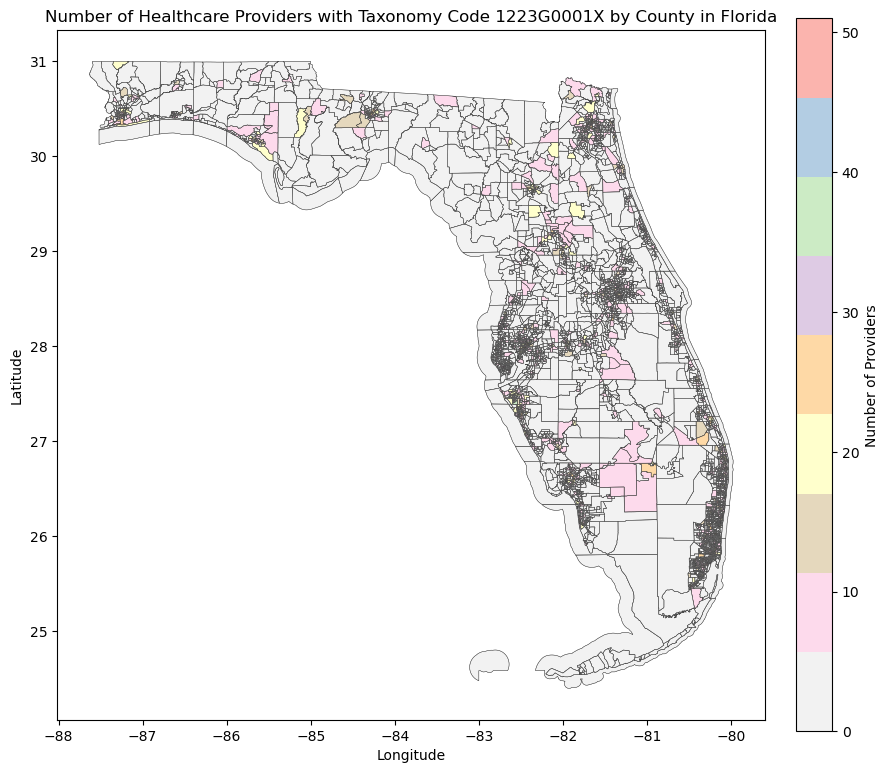

In [68]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Filter for the taxonomy code "1223G0001X"
filtered_data = Full_addresses_with_geodata[Full_addresses_with_geodata['Healthcare.Provider.Taxonomy.Code_1'] == '1223G0001X']

# Ensure latitude and longitude are valid
filtered_data = filtered_data[
    (filtered_data['latitude'].notnull()) & 
    (filtered_data['longitude'].notnull())
]
filtered_data = filtered_data[
    (filtered_data['latitude'] >= -90) & 
    (filtered_data['latitude'] <= 90)
]
filtered_data = filtered_data[
    (filtered_data['longitude'] >= -180) & 
    (filtered_data['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(filtered_data['longitude'], filtered_data['latitude'])]
gdf = gpd.GeoDataFrame(filtered_data, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the provider counts with a darker red color map
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='Pastel1_r', linewidth=0.3, edgecolor='black')

# Add the county boundaries on top
counties.boundary.plot(ax=ax, linewidth=0.2, color='grey', alpha=0.5)

# Add labels and title
plt.title('Number of Healthcare Providers with Taxonomy Code 1223G0001X by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


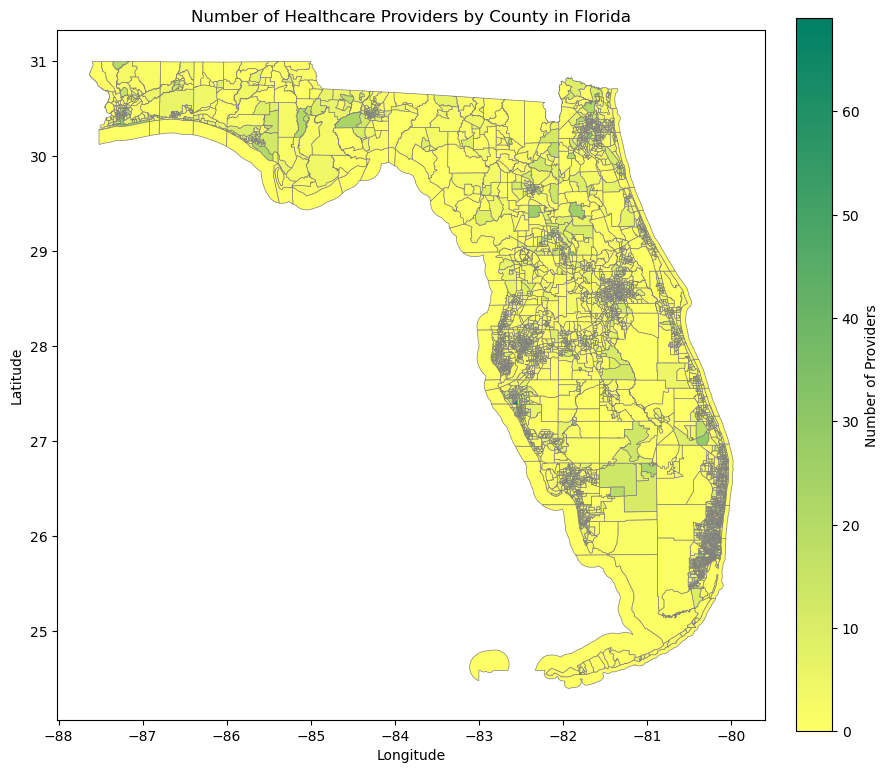

In [53]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Ensure latitude and longitude are valid
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'].notnull()) & 
    (Full_addresses_with_geodata['longitude'].notnull())
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'] >= -90) & 
    (Full_addresses_with_geodata['latitude'] <= 90)
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['longitude'] >= -180) & 
    (Full_addresses_with_geodata['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the provider counts with a darker red color map and thin county outlines
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='summer_r', linewidth=0.5, edgecolor='grey')

# Add labels and title
plt.title('Number of Healthcare Providers by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


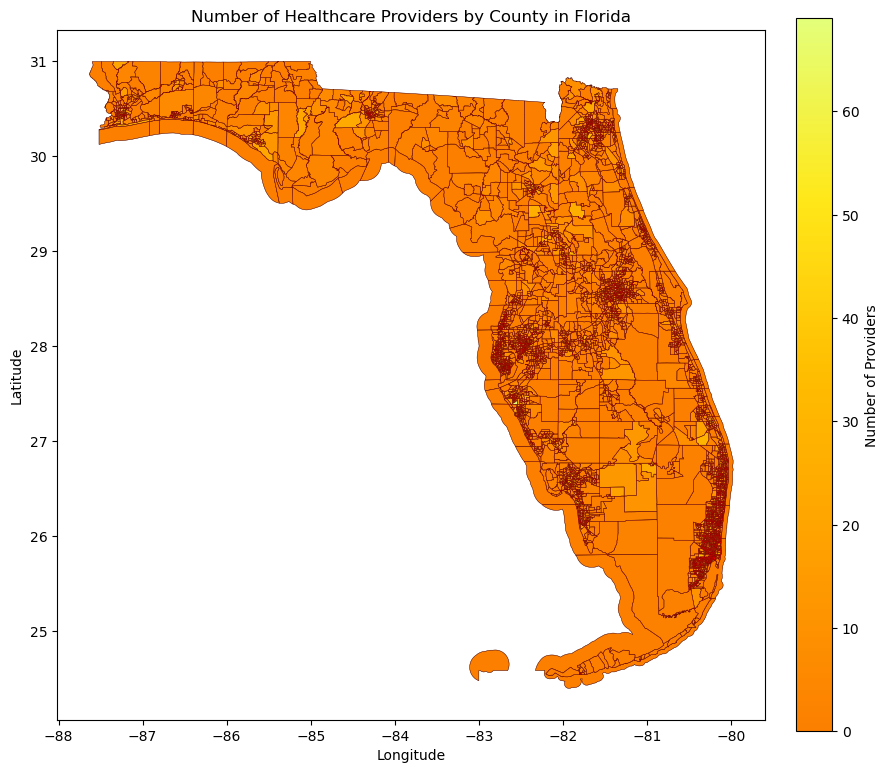

In [52]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Ensure latitude and longitude are valid
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'].notnull()) & 
    (Full_addresses_with_geodata['longitude'].notnull())
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'] >= -90) & 
    (Full_addresses_with_geodata['latitude'] <= 90)
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['longitude'] >= -180) & 
    (Full_addresses_with_geodata['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the provider counts with a darker red color map
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='Wistia_r', linewidth=0.3, edgecolor='black')

# Add the county boundaries on top
counties.boundary.plot(ax=ax, linewidth=0.2, color='red', alpha=0.5)

# Add labels and title
plt.title('Number of Healthcare Providers by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


In [163]:
taxonomy_codes = Full_addresses_with_geodata['Healthcare.Provider.Taxonomy.Code_1'].unique()
print(taxonomy_codes)

['1223G0001X' '1223P0221X' '1223D0001X' '124Q00000X' '125K00000X']


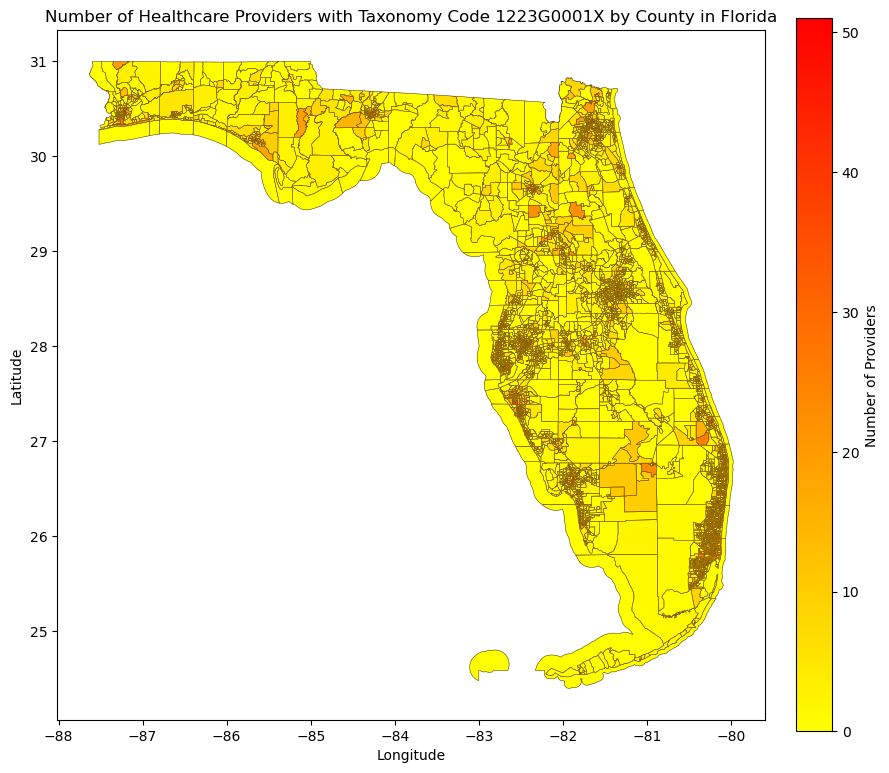

In [50]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Filter for the taxonomy code "1223G0001X"
filtered_data = Full_addresses_with_geodata[Full_addresses_with_geodata['Healthcare.Provider.Taxonomy.Code_1'] == '1223G0001X']

# Ensure latitude and longitude are valid
filtered_data = filtered_data[
    (filtered_data['latitude'].notnull()) & 
    (filtered_data['longitude'].notnull())
]
filtered_data = filtered_data[
    (filtered_data['latitude'] >= -90) & 
    (filtered_data['latitude'] <= 90)
]
filtered_data = filtered_data[
    (filtered_data['longitude'] >= -180) & 
    (filtered_data['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(filtered_data['longitude'], filtered_data['latitude'])]
gdf = gpd.GeoDataFrame(filtered_data, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the provider counts with a darker red color map
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='autumn_r', linewidth=0.3, edgecolor='black')

# Add the county boundaries on top
counties.boundary.plot(ax=ax, linewidth=0.2, color='orange', alpha=0.5)

# Add labels and title
plt.title('Number of Healthcare Providers with Taxonomy Code 1223G0001X by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


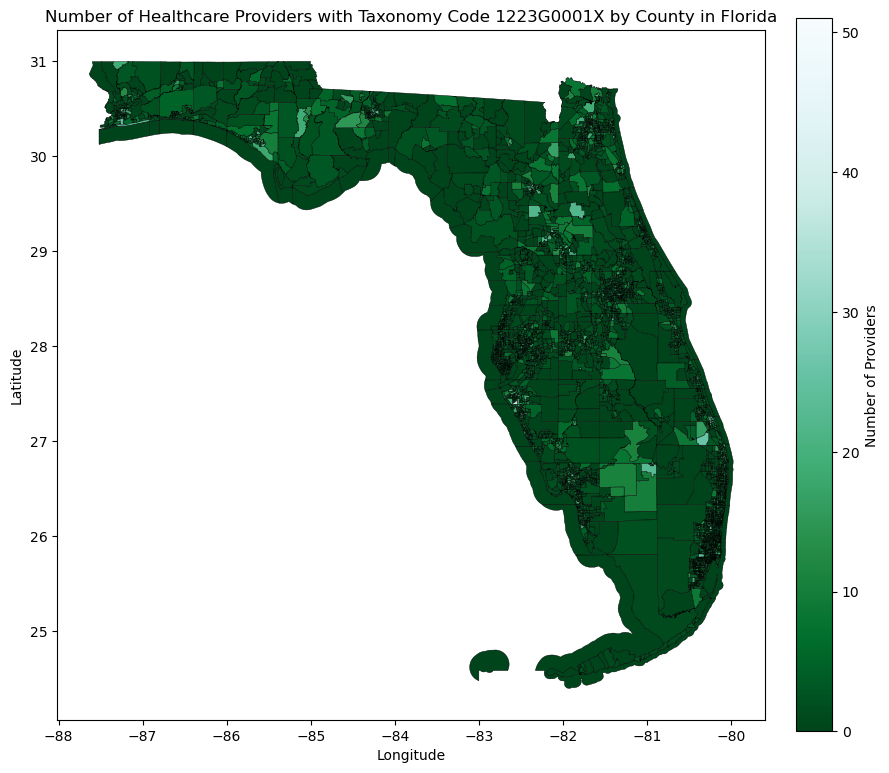

In [66]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Filter for the taxonomy code "1223G0001X"
filtered_data = Full_addresses_with_geodata[Full_addresses_with_geodata['Healthcare.Provider.Taxonomy.Code_1'] == '1223G0001X']

# Ensure latitude and longitude are valid
filtered_data = filtered_data[
    (filtered_data['latitude'].notnull()) & 
    (filtered_data['longitude'].notnull())
]
filtered_data = filtered_data[
    (filtered_data['latitude'] >= -90) & 
    (filtered_data['latitude'] <= 90)
]
filtered_data = filtered_data[
    (filtered_data['longitude'] >= -180) & 
    (filtered_data['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(filtered_data['longitude'], filtered_data['latitude'])]
gdf = gpd.GeoDataFrame(filtered_data, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the provider counts with a darker red color map
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='BuGn_r', linewidth=0.3, edgecolor='black')

# Add the county boundaries on top


# Add labels and title
plt.title('Number of Healthcare Providers with Taxonomy Code 1223G0001X by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


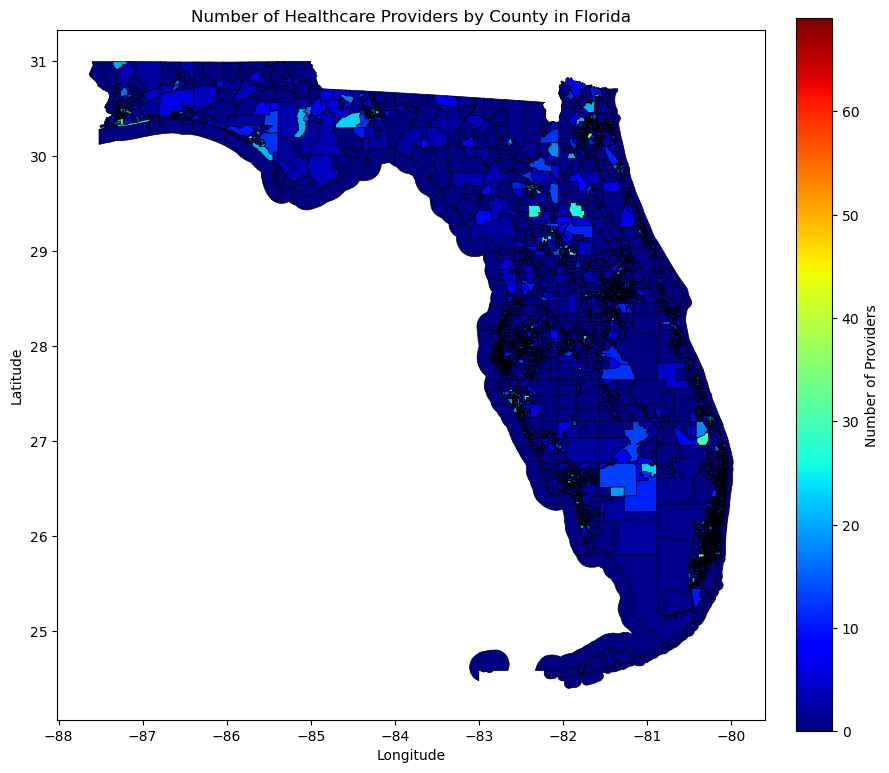

In [43]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Ensure latitude and longitude are valid
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'].notnull()) & 
    (Full_addresses_with_geodata['longitude'].notnull())
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'] >= -90) & 
    (Full_addresses_with_geodata['latitude'] <= 90)
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['longitude'] >= -180) & 
    (Full_addresses_with_geodata['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the provider counts with a darker red color map and thin county outlines
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='jet', linewidth=0.5, edgecolor='black')

# Add labels and title
plt.title('Number of Healthcare Providers by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


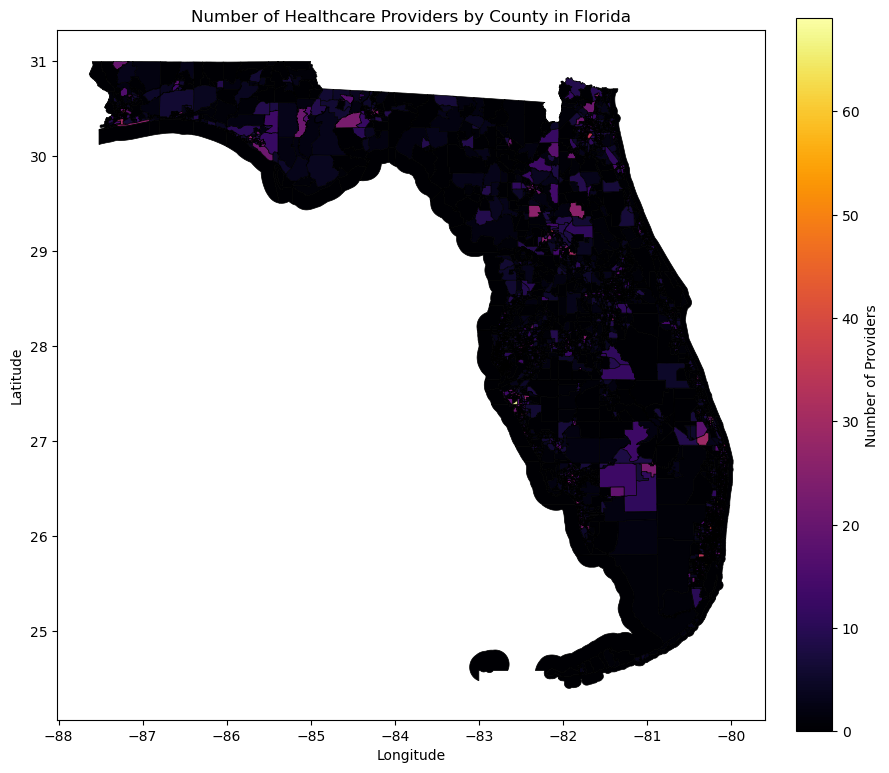

In [25]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Ensure latitude and longitude are valid
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'].notnull()) & 
    (Full_addresses_with_geodata['longitude'].notnull())
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['latitude'] >= -90) & 
    (Full_addresses_with_geodata['latitude'] <= 90)
]
Full_addresses_with_geodata = Full_addresses_with_geodata[
    (Full_addresses_with_geodata['longitude'] >= -180) & 
    (Full_addresses_with_geodata['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the provider counts with a darker red color map and thin county outlines
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='inferno', linewidth=0.5, edgecolor='black')

# Add labels and title
plt.title('Number of Healthcare Providers by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


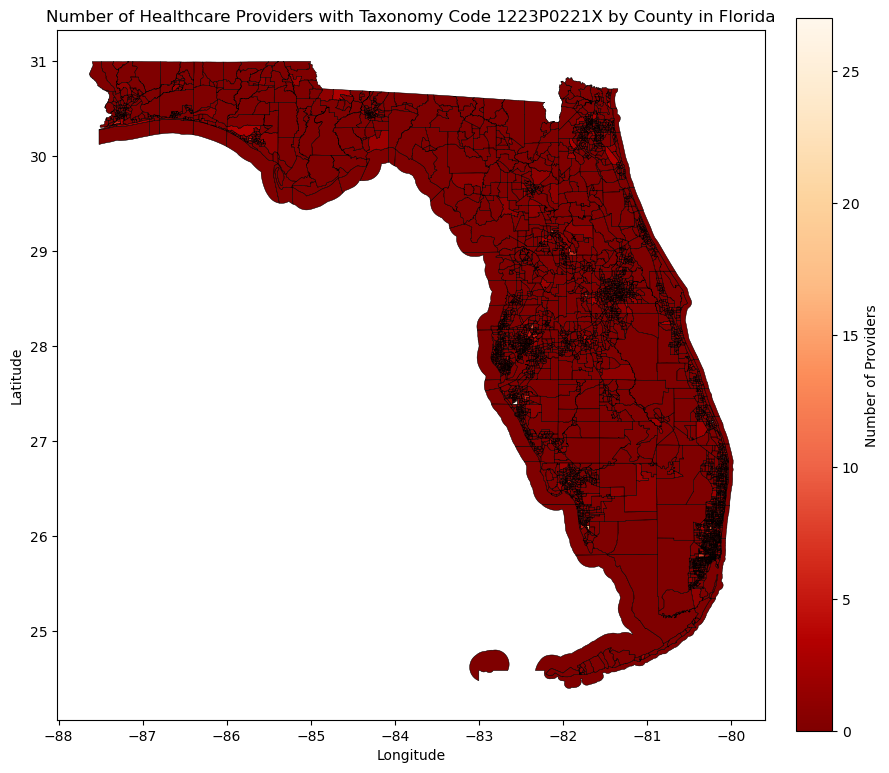

In [158]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Filter for the taxonomy code "1223G0001X"
filtered_data = Full_addresses_with_geodata[Full_addresses_with_geodata['Healthcare.Provider.Taxonomy.Code_1'] == '1223P0221X']

# Ensure latitude and longitude are valid
filtered_data = filtered_data[
    (filtered_data['latitude'].notnull()) & 
    (filtered_data['longitude'].notnull())
]
filtered_data = filtered_data[
    (filtered_data['latitude'] >= -90) & 
    (filtered_data['latitude'] <= 90)
]
filtered_data = filtered_data[
    (filtered_data['longitude'] >= -180) & 
    (filtered_data['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(filtered_data['longitude'], filtered_data['latitude'])]
gdf = gpd.GeoDataFrame(filtered_data, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the provider counts with a darker red color map
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='OrRd_r', linewidth=0.3, edgecolor='black')

# Add the county boundaries on top
counties.boundary.plot(ax=ax, linewidth=0.2, color='black', alpha=0.5)

# Add labels and title
plt.title('Number of Healthcare Providers with Taxonomy Code 1223P0221X by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


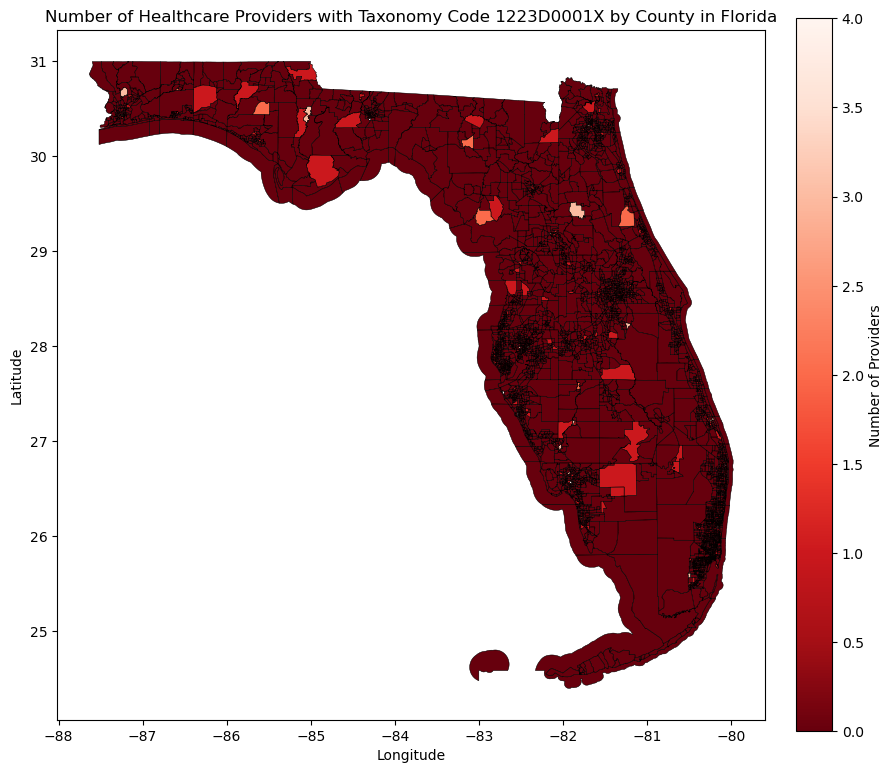

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Filter for the taxonomy code "1223G0001X"
filtered_data = Full_addresses_with_geodata[Full_addresses_with_geodata['Healthcare.Provider.Taxonomy.Code_1'] == '1223D0001X']

# Ensure latitude and longitude are valid
filtered_data = filtered_data[
    (filtered_data['latitude'].notnull()) & 
    (filtered_data['longitude'].notnull())
]
filtered_data = filtered_data[
    (filtered_data['latitude'] >= -90) & 
    (filtered_data['latitude'] <= 90)
]
filtered_data = filtered_data[
    (filtered_data['longitude'] >= -180) & 
    (filtered_data['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(filtered_data['longitude'], filtered_data['latitude'])]
gdf = gpd.GeoDataFrame(filtered_data, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the provider counts with a darker red color map
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='Reds_r', linewidth=0.3, edgecolor='black')

# Add the county boundaries on top
counties.boundary.plot(ax=ax, linewidth=0.2, color='black', alpha=0.5)

# Add labels and title
plt.title('Number of Healthcare Providers with Taxonomy Code 1223D0001X by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


In [ ]:
print('Dark colors that work: Accent_r, BrBG_r, BuPu_r, GnBu_r, Oranges_r, PuBu_r, RdBu_r, Spectral, YlOrRd_r ')
print('Lighter colors that work: Wistia_r, autumn, summer, vlag')
print('Best colors: OrRd_r, Reds_r')

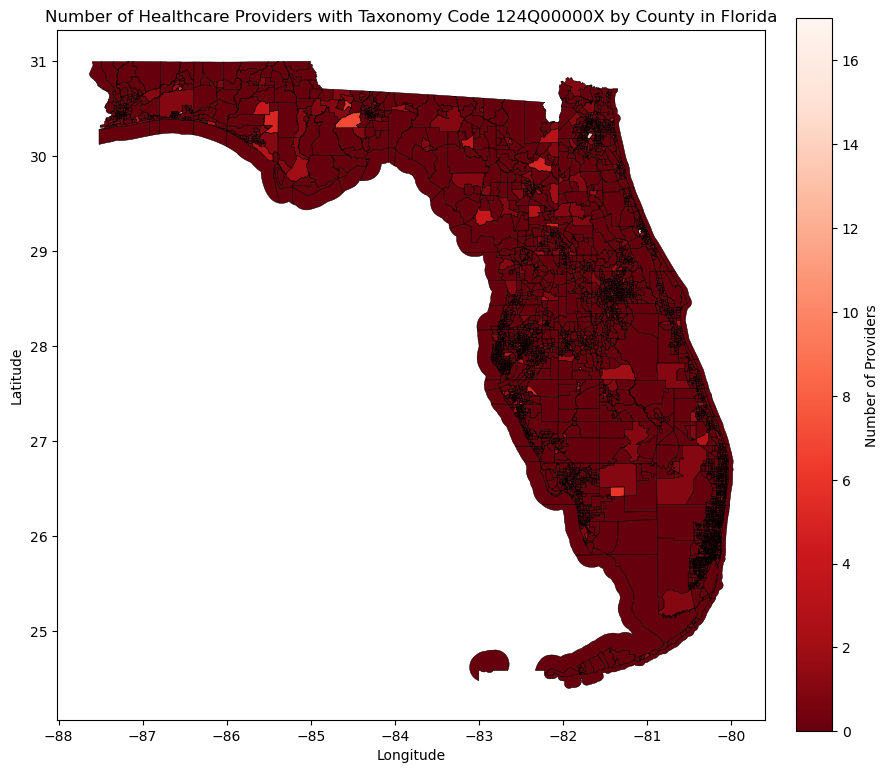

In [162]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Filter for the taxonomy code "1223G0001X"
filtered_data = Full_addresses_with_geodata[Full_addresses_with_geodata['Healthcare.Provider.Taxonomy.Code_1'] == '124Q00000X']

# Ensure latitude and longitude are valid
filtered_data = filtered_data[
    (filtered_data['latitude'].notnull()) & 
    (filtered_data['longitude'].notnull())
]
filtered_data = filtered_data[
    (filtered_data['latitude'] >= -90) & 
    (filtered_data['latitude'] <= 90)
]
filtered_data = filtered_data[
    (filtered_data['longitude'] >= -180) & 
    (filtered_data['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(filtered_data['longitude'], filtered_data['latitude'])]
gdf = gpd.GeoDataFrame(filtered_data, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the provider counts with a darker red color map
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='Reds_r', linewidth=0.3, edgecolor='black')

# Add the county boundaries on top
counties.boundary.plot(ax=ax, linewidth=0.2, color='black', alpha=0.5)

# Add labels and title
plt.title('Number of Healthcare Providers with Taxonomy Code 124Q00000X by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


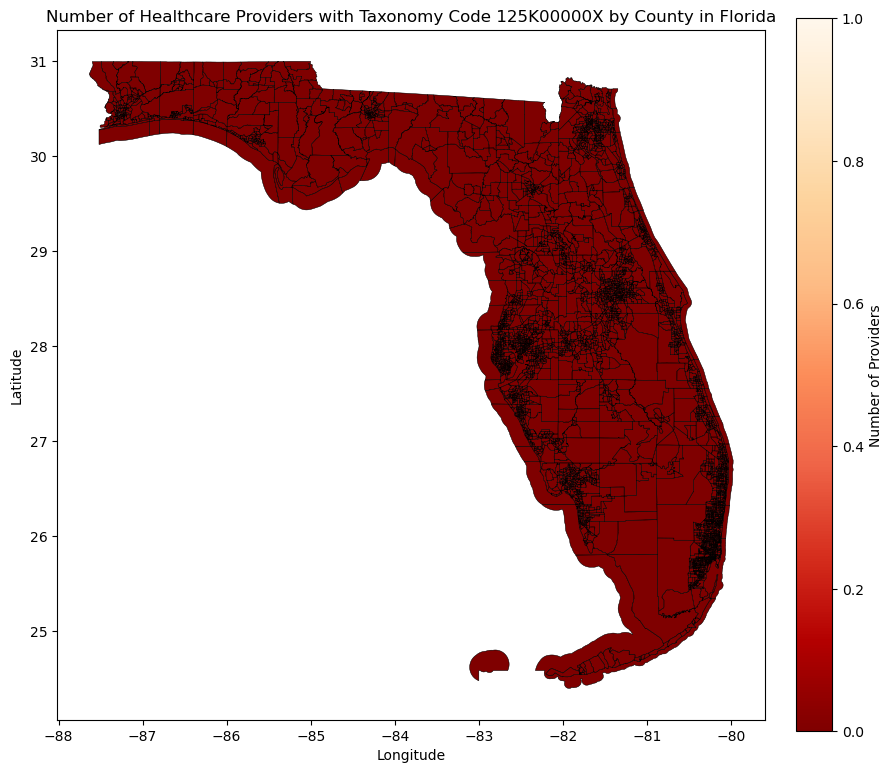

In [161]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\rianl\OneDrive\Desktop\Research\Full_addresses_with_geodata.csv"
Full_addresses_with_geodata = pd.read_csv(file_path)

# Filter for the taxonomy code "1223G0001X"
filtered_data = Full_addresses_with_geodata[Full_addresses_with_geodata['Healthcare.Provider.Taxonomy.Code_1'] == '125K00000X']

# Ensure latitude and longitude are valid
filtered_data = filtered_data[
    (filtered_data['latitude'].notnull()) & 
    (filtered_data['longitude'].notnull())
]
filtered_data = filtered_data[
    (filtered_data['latitude'] >= -90) & 
    (filtered_data['latitude'] <= 90)
]
filtered_data = filtered_data[
    (filtered_data['longitude'] >= -180) & 
    (filtered_data['longitude'] <= 180)
]

# Step 2: Create a GeoDataFrame for providers
geometry = [Point(xy) for xy in zip(filtered_data['longitude'], filtered_data['latitude'])]
gdf = gpd.GeoDataFrame(filtered_data, geometry=geometry)

# Read the county shapefile
shapefile_path = r"C:\Users\rianl\OneDrive\Desktop\Research\tl_rd22_12_tract.shp"
counties = gpd.read_file(shapefile_path)

# Ensure the coordinate systems match
gdf = gdf.set_crs(counties.crs)

# Spatial join to aggregate provider counts by county
gdf_counties = gpd.sjoin(gdf, counties, how='left', predicate='within')
provider_counts = gdf_counties.groupby('NAME').size().reset_index(name='provider_count')

# Merge the provider counts with the county shapefile data
counties = counties.merge(provider_counts, left_on='NAME', right_on='NAME', how='left')

# Replace NaN values with 0 for counties with no providers
counties['provider_count'] = counties['provider_count'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the provider counts with a darker red color map
counties.plot(column='provider_count', ax=ax, legend=True,
              legend_kwds={'label': "Number of Providers",
                           'orientation': "vertical",
                           'fraction': 0.046, 'pad': 0.04},
              cmap='OrRd_r', linewidth=0.3, edgecolor='black')

# Add the county boundaries on top
counties.boundary.plot(ax=ax, linewidth=0.2, color='black', alpha=0.5)

# Add labels and title
plt.title('Number of Healthcare Providers with Taxonomy Code 125K00000X by County in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


In [43]:
gdf

Unnamed: 0         NPI  Entity.Type.Code  \
0               1  1306849336                 1   
1               2  1932102936                 1   
2               3  1265435267                 1   
3               4  1982607974                 1   
4               5  1861495764                 1   
...           ...         ...               ...   
10440       10441  1497512990                 2   
10441       10442  1487411435                 2   
10442       10443  1720846413                 2   
10443       10444  1508624388                 2   
10444       10445  1407614175                 2   

      Provider.First.Line.Business.Practice.Location.Address  \
0                                          105 SOLANA RD       
1                                        9200 NW 44TH ST       
2                                 5163 ORANGE GROVE BLVD       
3                                    306 PILAKLAKAHA AVE       
4                                  7575 DR PHILLIPS BLVD       
...                                                  ...       
10440                              6633 FOREST HILL BLVD       
10441                                2412 N STATE ROAD 7       
10442                            1207 BRUCE B DOWNS BLVD       
10443                                14771 BISCAYNE BLVD       
10444                                     1582 W 68TH ST       

      Provider.Second.Line.Business.Practice.Location.Address  \
0                                                  STE A        
1                                                    NaN        
2                                                    NaN        
3                                                  STE A        
4                                                STE 160        
...                                                  ...        
10440                                                NaN        
10441                                                NaN        
10442                                                NaN        
10443                                                NaN        
10444                                                NaN        

      Provider.Business.Practice.Location.Address.City.Name  \
0                                            PONTE VEDRA      
1                                                SUNRISE      
2                                       NORTH FORT MYERS      
3                                             AUBURNDALE      
4                                                ORLANDO      
...                                                  ...      
10440                                    WEST PALM BEACH      
10441                                   LAUDERDALE LAKES      
10442                                      WESLEY CHAPEL      
10443                                        NORTH MIAMI      
10444                                            HIALEAH      

      Provider.Business.Practice.Location.Address.State.Name  \
0                                                     FL       
1                                                     FL       
2                                                     FL       
3                                                     FL       
4                                                     FL       
...                                                  ...       
10440                                                 FL       
10441                                                 FL       
10442                                                 FL       
10443                                                 FL       
10444                                                 FL       

       Provider.Business.Practice.Location.Address.Postal.Code  \
0                                              320825229         
1                                              333515263         
2                                              339035230         
3                                              3382333

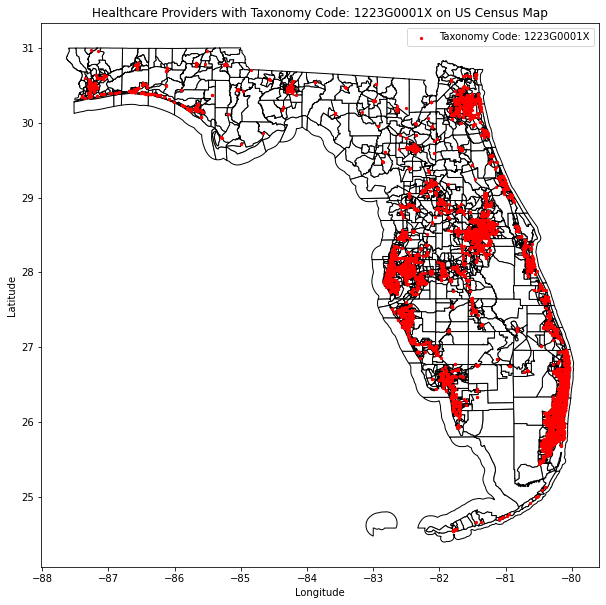

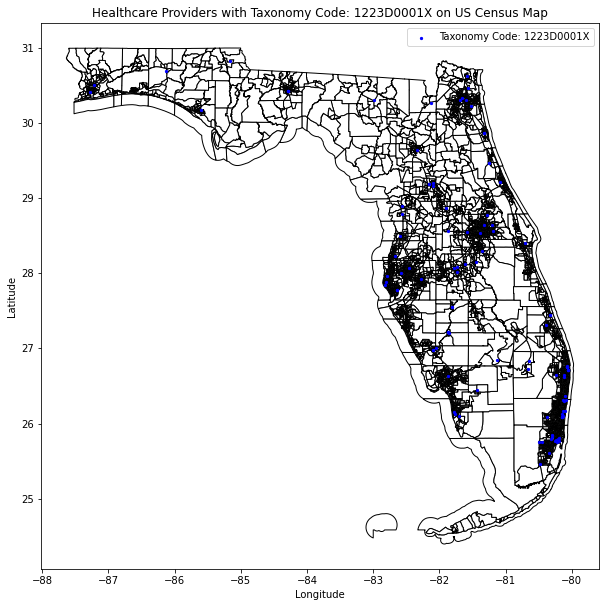

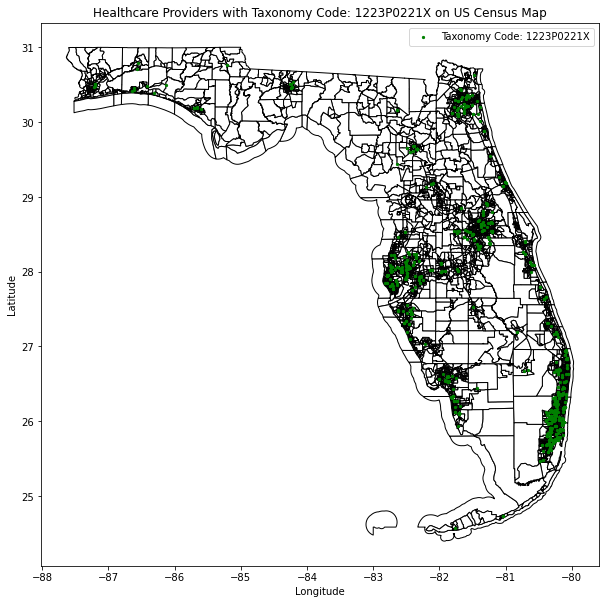

In [36]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


# Step 2: Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Step 3: Load Census Tract shapefiles
# Replace 'path_to_census_tract_shapefiles' with the actual path to your downloaded shapefiles
census_tracts = gpd.read_file("C:/Users/babus/Downloads/tl_rd22_12_tract/tl_rd22_12_tract.shp")

gdf = gdf.set_crs(census_tracts.crs)

# Step 4: Plot the data for each taxonomy code
colors = {
    '1223G0001X': 'red',
    '1223D0001X': 'blue',
    '1223P0221X': 'green'
}

for taxonomy_code, color in colors.items():
    fig, ax = plt.subplots(1, 1, figsize=(10, 15))
    
    # Plot the Census Tract map
    census_tracts.plot(ax=ax, color='white', edgecolor='black')
    
    # Plot points for the specific taxonomy code
    subset = gdf[gdf['Healthcare.Provider.Taxonomy.Code_1'] == taxonomy_code]
    subset.plot(ax=ax, color=color, markersize=5, label=f'Taxonomy Code: {taxonomy_code}')
    
    # Add labels and title
    plt.title(f'Healthcare Providers with Taxonomy Code: {taxonomy_code} on US Census Map')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    
    # Save the plot
    plt.savefig(f'healthcare_providers_{taxonomy_code}.png')
    plt.show()

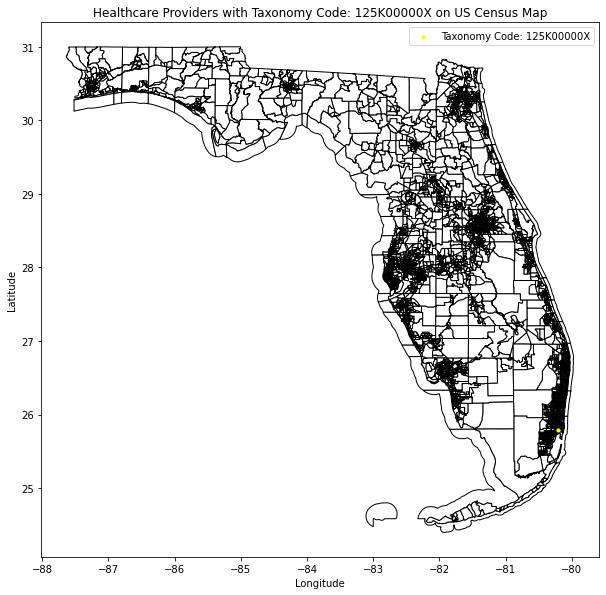

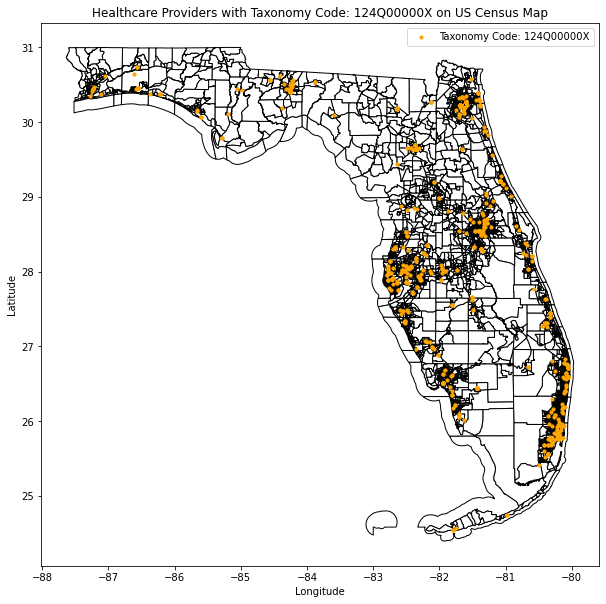

In [38]:
import pandas as pd


taxonomy_code
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


# Step 2: Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Step 3: Load Census Tract shapefiles
census_tracts = gpd.read_file("C:/Users/babus/Downloads/tl_rd22_12_tract/tl_rd22_12_tract.shp")

gdf = gdf.set_crs(census_tracts.crs)

# Step 4: Plot the data for each taxonomy code
colors = {
   '125K00000X': 'yellow',
    '124Q00000X': 'orange'
    #'125J00000X-"Dental Therapist"': 'purple'
}

for taxonomy_code, color in colors.items():
    fig, ax = plt.subplots(1, 1, figsize=(10, 15))
    
    # Plot the Census Tract map
    census_tracts.plot(ax=ax, color='white', edgecolor='black')
    
    # Plot points for the specific taxonomy code
    subset = gdf[gdf['Healthcare.Provider.Taxonomy.Code_1'] == taxonomy_code]
    subset.plot(ax=ax, color=color, markersize=10, label=f'Taxonomy Code: {taxonomy_code}')
    
    # Add labels and title
    plt.title(f'Healthcare Providers with Taxonomy Code: {taxonomy_code} on US Census Map')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    
    # Save the plot
    plt.savefig(f'healthcare_providers_{taxonomy_code}.png')
    plt.show()

In [45]:
Full_addresses_with_geodata

Unnamed: 0         NPI  Entity.Type.Code  \
0               1  1306849336                 1   
1               2  1932102936                 1   
2               3  1265435267                 1   
3               4  1982607974                 1   
4               5  1861495764                 1   
...           ...         ...               ...   
10440       10441  1497512990                 2   
10441       10442  1487411435                 2   
10442       10443  1720846413                 2   
10443       10444  1508624388                 2   
10444       10445  1407614175                 2   

      Provider.First.Line.Business.Practice.Location.Address  \
0                                          105 SOLANA RD       
1                                        9200 NW 44TH ST       
2                                 5163 ORANGE GROVE BLVD       
3                                    306 PILAKLAKAHA AVE       
4                                  7575 DR PHILLIPS BLVD       
...                                                  ...       
10440                              6633 FOREST HILL BLVD       
10441                                2412 N STATE ROAD 7       
10442                            1207 BRUCE B DOWNS BLVD       
10443                                14771 BISCAYNE BLVD       
10444                                     1582 W 68TH ST       

      Provider.Second.Line.Business.Practice.Location.Address  \
0                                                  STE A        
1                                                    NaN        
2                                                    NaN        
3                                                  STE A        
4                                                STE 160        
...                                                  ...        
10440                                                NaN        
10441                                                NaN        
10442                                                NaN        
10443                                                NaN        
10444                                                NaN        

      Provider.Business.Practice.Location.Address.City.Name  \
0                                            PONTE VEDRA      
1                                                SUNRISE      
2                                       NORTH FORT MYERS      
3                                             AUBURNDALE      
4                                                ORLANDO      
...                                                  ...      
10440                                    WEST PALM BEACH      
10441                                   LAUDERDALE LAKES      
10442                                      WESLEY CHAPEL      
10443                                        NORTH MIAMI      
10444                                            HIALEAH      

      Provider.Business.Practice.Location.Address.State.Name  \
0                                                     FL       
1                                                     FL       
2                                                     FL       
3                                                     FL       
4                                                     FL       
...                                                  ...       
10440                                                 FL       
10441                                                 FL       
10442                                                 FL       
10443                                                 FL       
10444                                                 FL       

       Provider.Business.Practice.Location.Address.Postal.Code  \
0                                              320825229         
1                                              333515263         
2                                              339035230         
3                                              3382333

In [33]:
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Load Census Tract shapefiles
census_tracts = gpd.read_file("C:/Users/babus/Downloads/tl_rd22_12_tract/tl_rd22_12_tract.shp")
gdf = gdf.set_crs(census_tracts.crs)


In [32]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


C:\Users\babus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


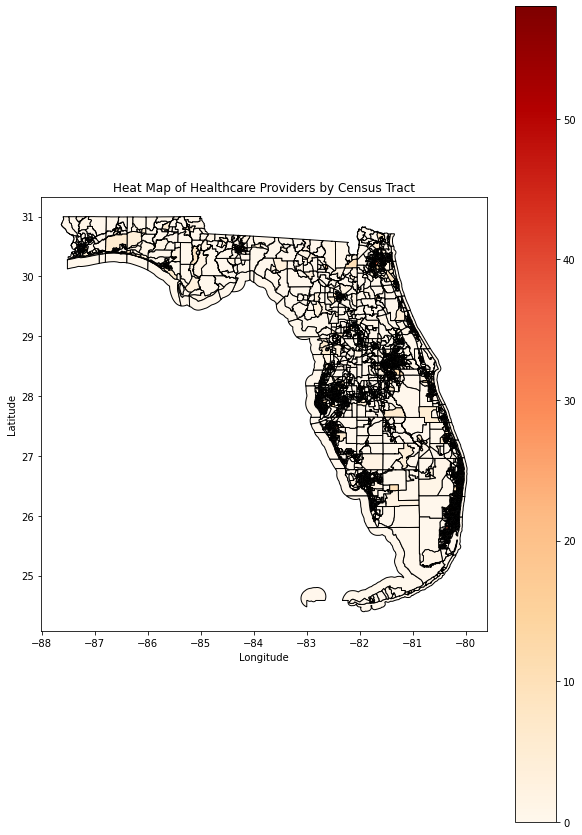

In [39]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


# Convert your data to GeoDataFrame
geometry = [Point(xy) for xy in zip(Full_addresses_with_geodata['longitude'], Full_addresses_with_geodata['latitude'])]
gdf = gpd.GeoDataFrame(Full_addresses_with_geodata, geometry=geometry)

# Load Census Tract shapefiles
census_tracts = gpd.read_file("C:/Users/babus/Downloads/tl_rd22_12_tract/tl_rd22_12_tract.shp")

# Ensure both GeoDataFrames have the same CRS
gdf = gdf.set_crs(census_tracts.crs, allow_override=True)

# Perform spatial join and aggregate data by census tract
tract_counts = gpd.sjoin(gdf, census_tracts, how="left", op='intersects').groupby('index_right').size()
census_tracts['count'] = tract_counts

# Replace NaN values with 0
census_tracts['count'] = census_tracts['count'].fillna(0)

# Plot heat map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
census_tracts.plot(column='count', ax=ax, legend=True, cmap='OrRd', edgecolor='black')
plt.title('Heat Map of Healthcare Providers by Census Tract')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [20]:
pip install folium

  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.
